<a href="https://colab.research.google.com/github/Asma00100/heart_disease_prediction_ML_project/blob/main/cardio_vasc_dis_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv(r'/content/drive/MyDrive/Colab_Notebooks/dataset/cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


ap_hi: Systolic blood pressure (the higher value when the heart contracts)

ap_lo: Diastolic blood pressure (the lower value when the heart relaxes)

cholesterol: Cholesterol level (1 = normal, 2 = above normal, 3 = well above normal)

gluc: Glucose level (1 = normal, 2 = above normal, 3 = well above normal)


In [4]:
df.shape

(70000, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [7]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df['age_years'] = df['age'] // 365

In [10]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [11]:
df.drop(['age','id'],axis=1,inplace=True)

In [12]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,52.840671
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.766774
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [13]:
df['cardio'].value_counts()

,count
cardio,
0,35021
1,34979


<Axes: xlabel='gender', ylabel='count'>

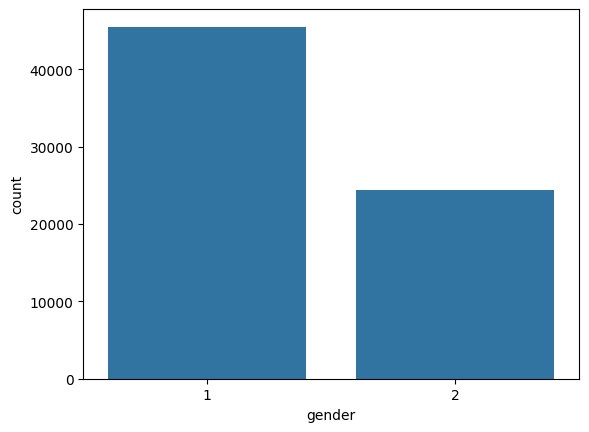

In [14]:
sns.countplot(x='gender',data=df)

<Axes: xlabel='cardio', ylabel='count'>

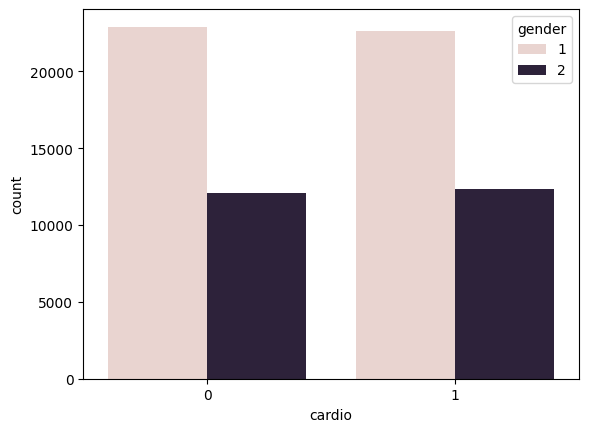

In [15]:
sns.countplot(x='cardio',hue='gender',data=df)

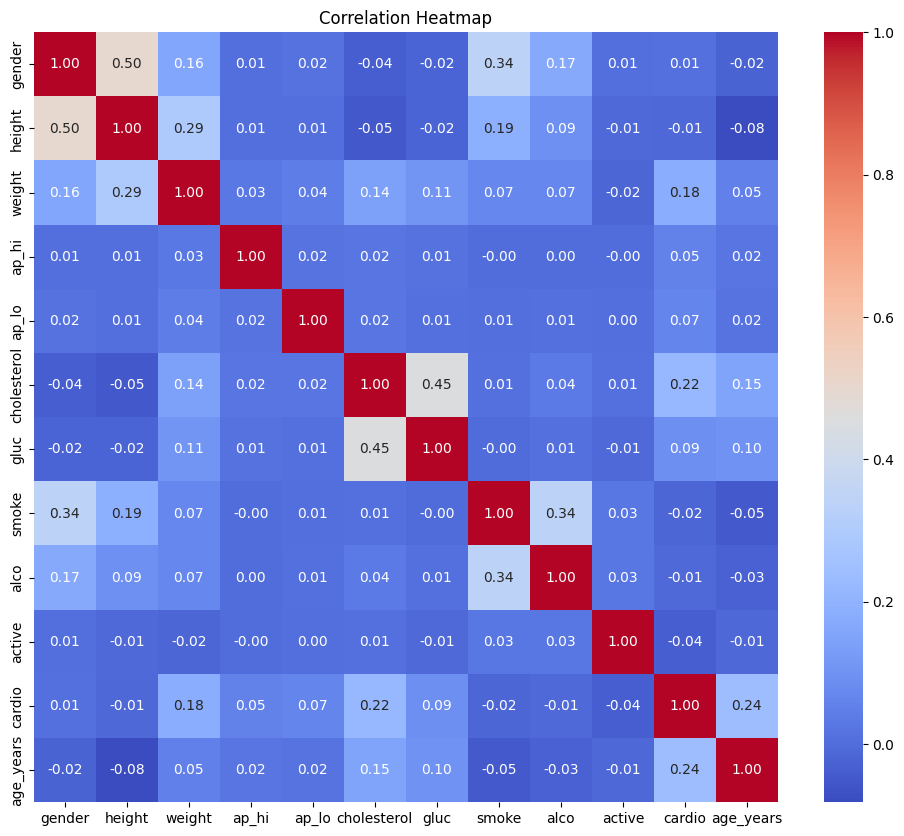

In [16]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

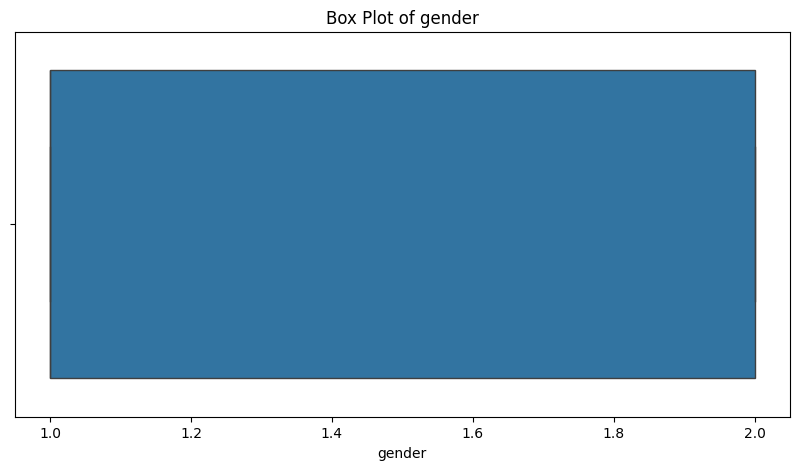

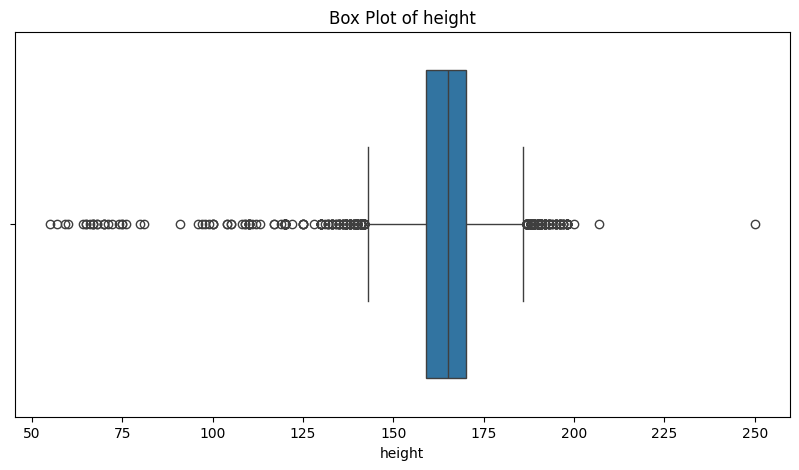

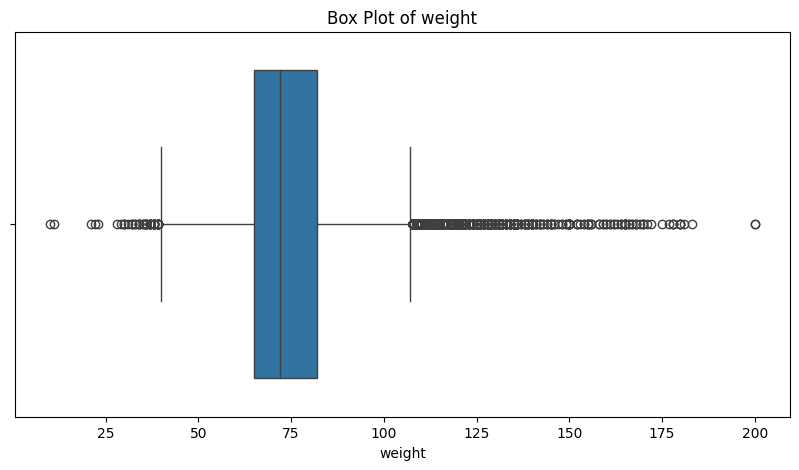

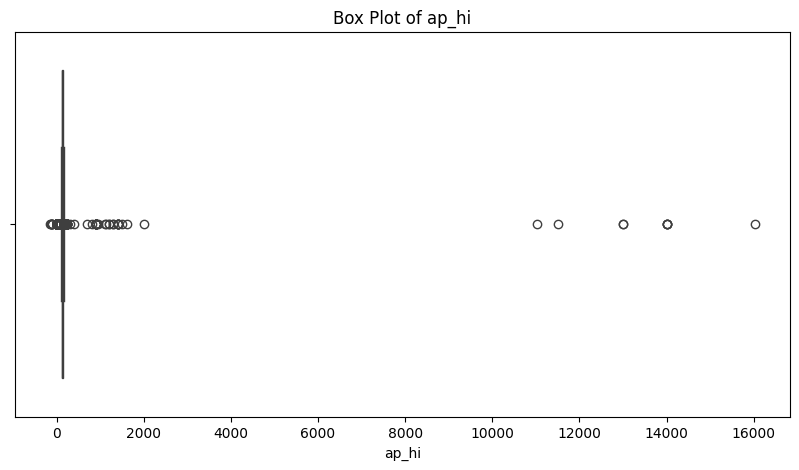

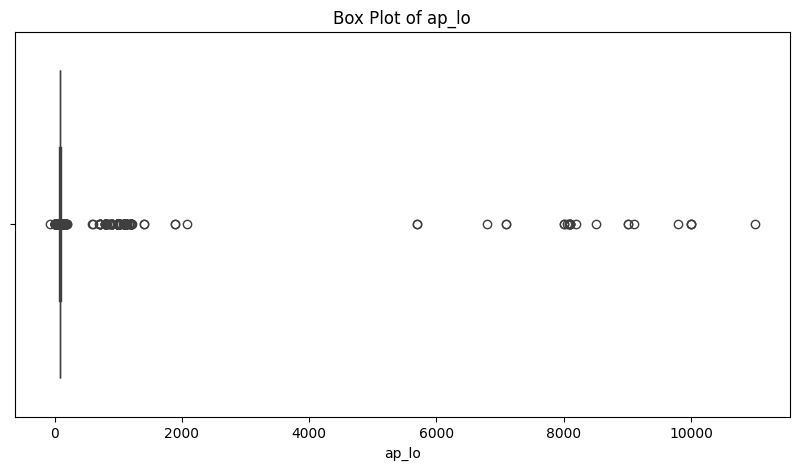

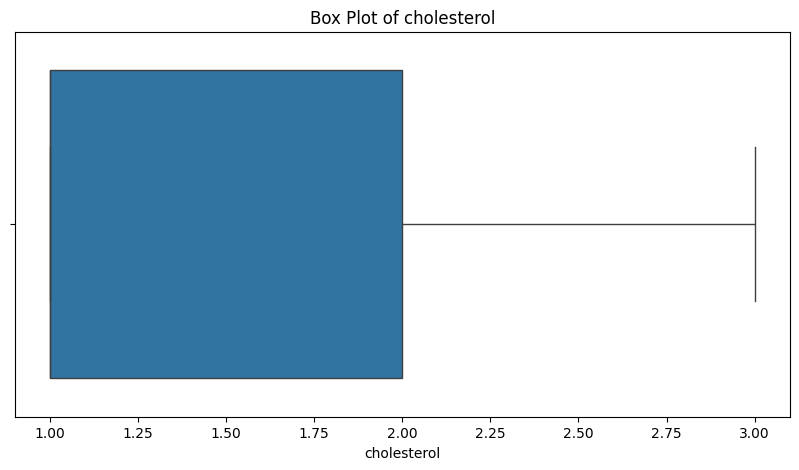

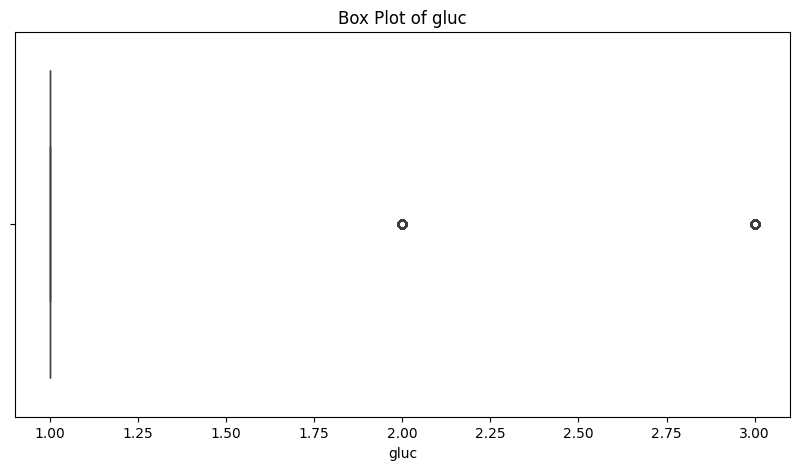

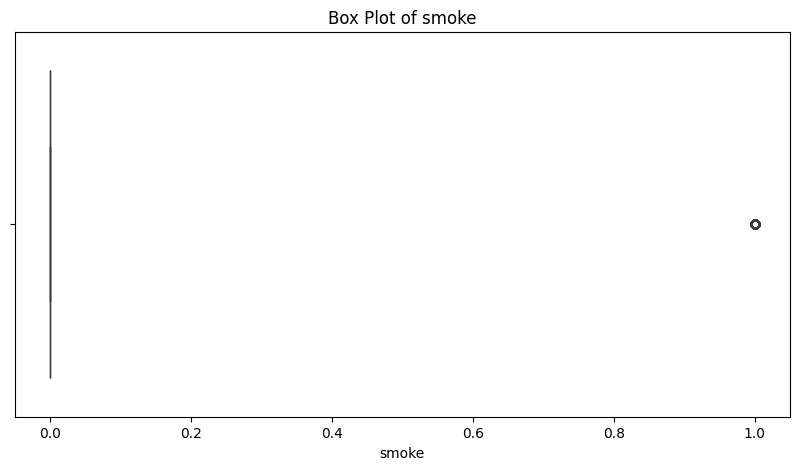

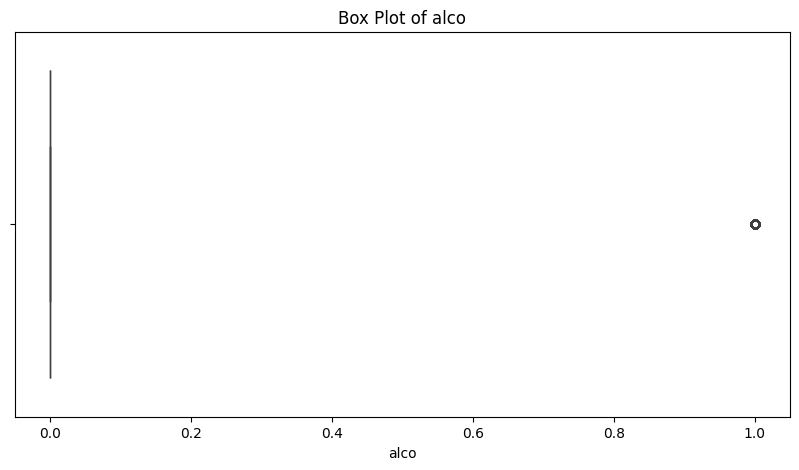

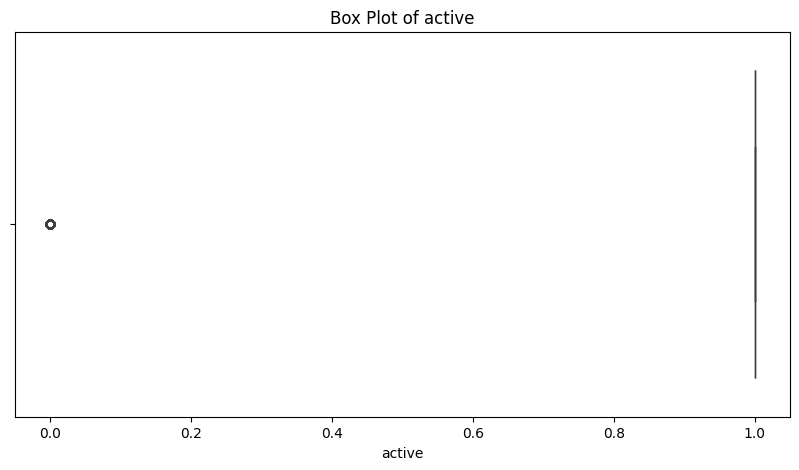

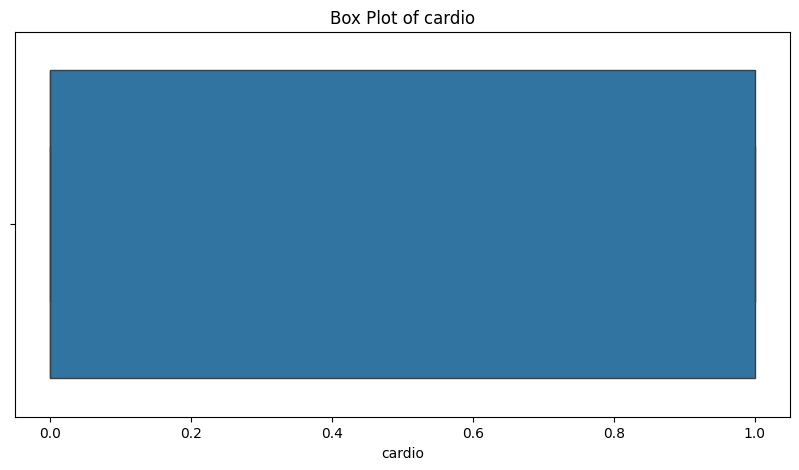

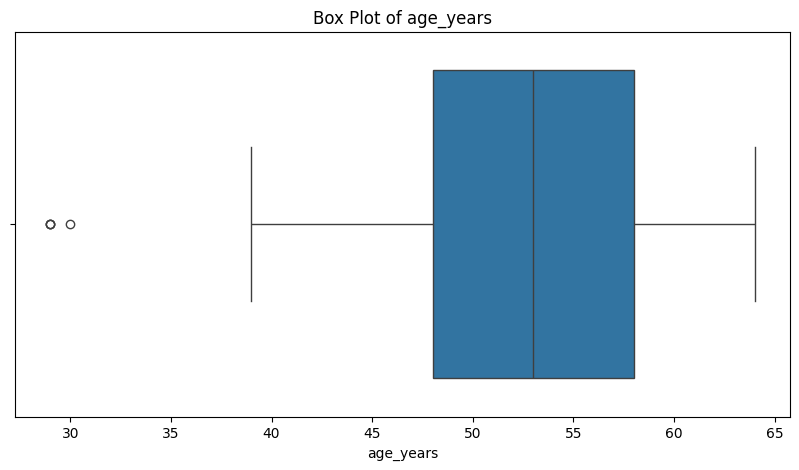

In [17]:
for col in df:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

In [18]:
def remove_outliers(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

for col in df:
    df = remove_outliers(df, col, multiplier=3)

In [19]:
x= df.drop('cardio',axis=1)
y=df['cardio']

In [20]:
x.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
0,2,168,62.0,110,80,1,1,0,0,1,50
3,2,169,82.0,150,100,1,1,0,0,1,48
8,1,158,71.0,110,70,1,1,0,0,1,48
10,1,169,80.0,120,80,1,1,0,0,1,61
11,2,173,60.0,120,80,1,1,0,0,1,51


In [21]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
x,y = smote.fit_resample(x, y)

In [22]:
from sklearn.preprocessing import StandardScaler
xcols=x.columns
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x,columns=xcols)
x.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
0,1.588999,0.516021,-0.797011,-0.979858,-0.077348,0.0,0.0,0.0,0.0,0.0,-0.379511
1,1.588999,0.648483,0.739951,1.581710,2.158809,0.0,0.0,0.0,0.0,0.0,-0.676901
2,-0.629327,-0.808600,-0.105378,-0.979858,-1.195426,0.0,0.0,0.0,0.0,0.0,-0.676901
3,-0.629327,0.648483,0.586255,-0.339466,-0.077348,0.0,0.0,0.0,0.0,0.0,1.256131
4,1.588999,1.178331,-0.950707,-0.339466,-0.077348,0.0,0.0,0.0,0.0,0.0,-0.230816


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
x_train.shape,y_train.shape

((31459, 11), (31459,))

In [25]:
x_test.shape,y_test.shape

((7865, 11), (7865,))

In [45]:
#from sklearn.linear_model import LogisticRegression
#lr=LogisticRegression()
#lr.fit(x_train,y_train)
#prediction=lr.predict(x_test)

In [46]:
#lr.score(x_train, y_train), lr.score(x_test, y_test)

In [47]:
from sklearn.metrics import classification_report
#print(classification_report(y_test,prediction))

In [39]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

In [40]:
rf.score(x_train, y_train), rf.score(x_test, y_test)

(0.9672271845894657, 0.7177368086458995)

In [42]:
parametre = {'n_estimators': 100,'max_depth': 10,'min_samples_split': 5,'min_samples_leaf': 6,'max_features': 'sqrt'}
rf = RandomForestClassifier(**parametre)
rf.fit(x_train, y_train)

prediction = rf.predict(x_test)

In [43]:
rf.score(x_train, y_train), rf.score(x_test, y_test)

(0.7392796973838965, 0.7276541640178004)

In [44]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      3935
           1       0.76      0.66      0.71      3930

    accuracy                           0.73      7865
   macro avg       0.73      0.73      0.73      7865
weighted avg       0.73      0.73      0.73      7865



In [ ]:
import joblib

In [ ]:

joblib.dump(rf, 'm.pkl')


['m.pkl']

In [ ]:
joblib.dump(sc, 's.pkl')

['s.pkl']

In [ ]:
from google.colab import files

files.download('s.pkl')
files.download('m.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sklearn
sklearn.__version__

'1.6.1'